<div align="center"> 

---

# **Manuscript Figures**

</div>

----

<div align="center"> 


</div>

---
# <u> **Description:**</u>

Visualization for manuscript figures.

---

### **General settings options**

In [1]:
addTaskCallback(function(...) {set.seed(42);TRUE})
options(warn=-1) # to turn off warnings
#options(warn=0) # to turn on warnings
options(repr.plot.width=15, repr.plot.height=14) # to resize plots

1 
1

In [2]:
# Make sure to install pacman before we begin
  if (!require("pacman")) {
  install.packages("pacman")
  }

# Load required packages  
  pacman::p_load(tidyverse,devtools,ggpubr,ggthemes,png,grid,gridExtra,janitor,patchwork,
    ggside,gghalves,ggdist,easystats,lme4,ggeffects,emmeans,rstatix)


Loading required package: pacman



#### Load Data

In [3]:
setwd("../")

In [4]:
load("Data/Alcohol_consumption.RData")

In [5]:
load("Data/Behavior_metricsEPM.RData")
load("Data/Behavior_metricsNOR.RData")
load("Data/Behavior_metricsCPP.RData")

In [6]:
theme_settings_fill <- theme(panel.background = element_rect(fill = "transparent"), # bg of the panel
    plot.background = element_rect(fill = "transparent", color = NA), # bg of the plot
    panel.grid.major = element_blank(), # get rid of major grid
    panel.grid.minor = element_blank(), # get rid of minor grid
    legend.background = element_rect(fill = "transparent"), # get rid of legend bg
    legend.box.background = element_rect(fill = "transparent"), # get rid of legend panel bg
    legend.key = element_rect(fill = "transparent", colour = NA), # get rid of key legend fill, and of the surrounding
    axis.line = element_line(colour = "black") # adding a black line for x and y axis
)

In [7]:
theme_settings <- theme(text = element_text(size=22,family = "Times New Roman"),
    legend.title=element_blank())

### **Figure for Design**

In [8]:
# Read png files
Design <- readPNG("Figures/Design/Design.png")


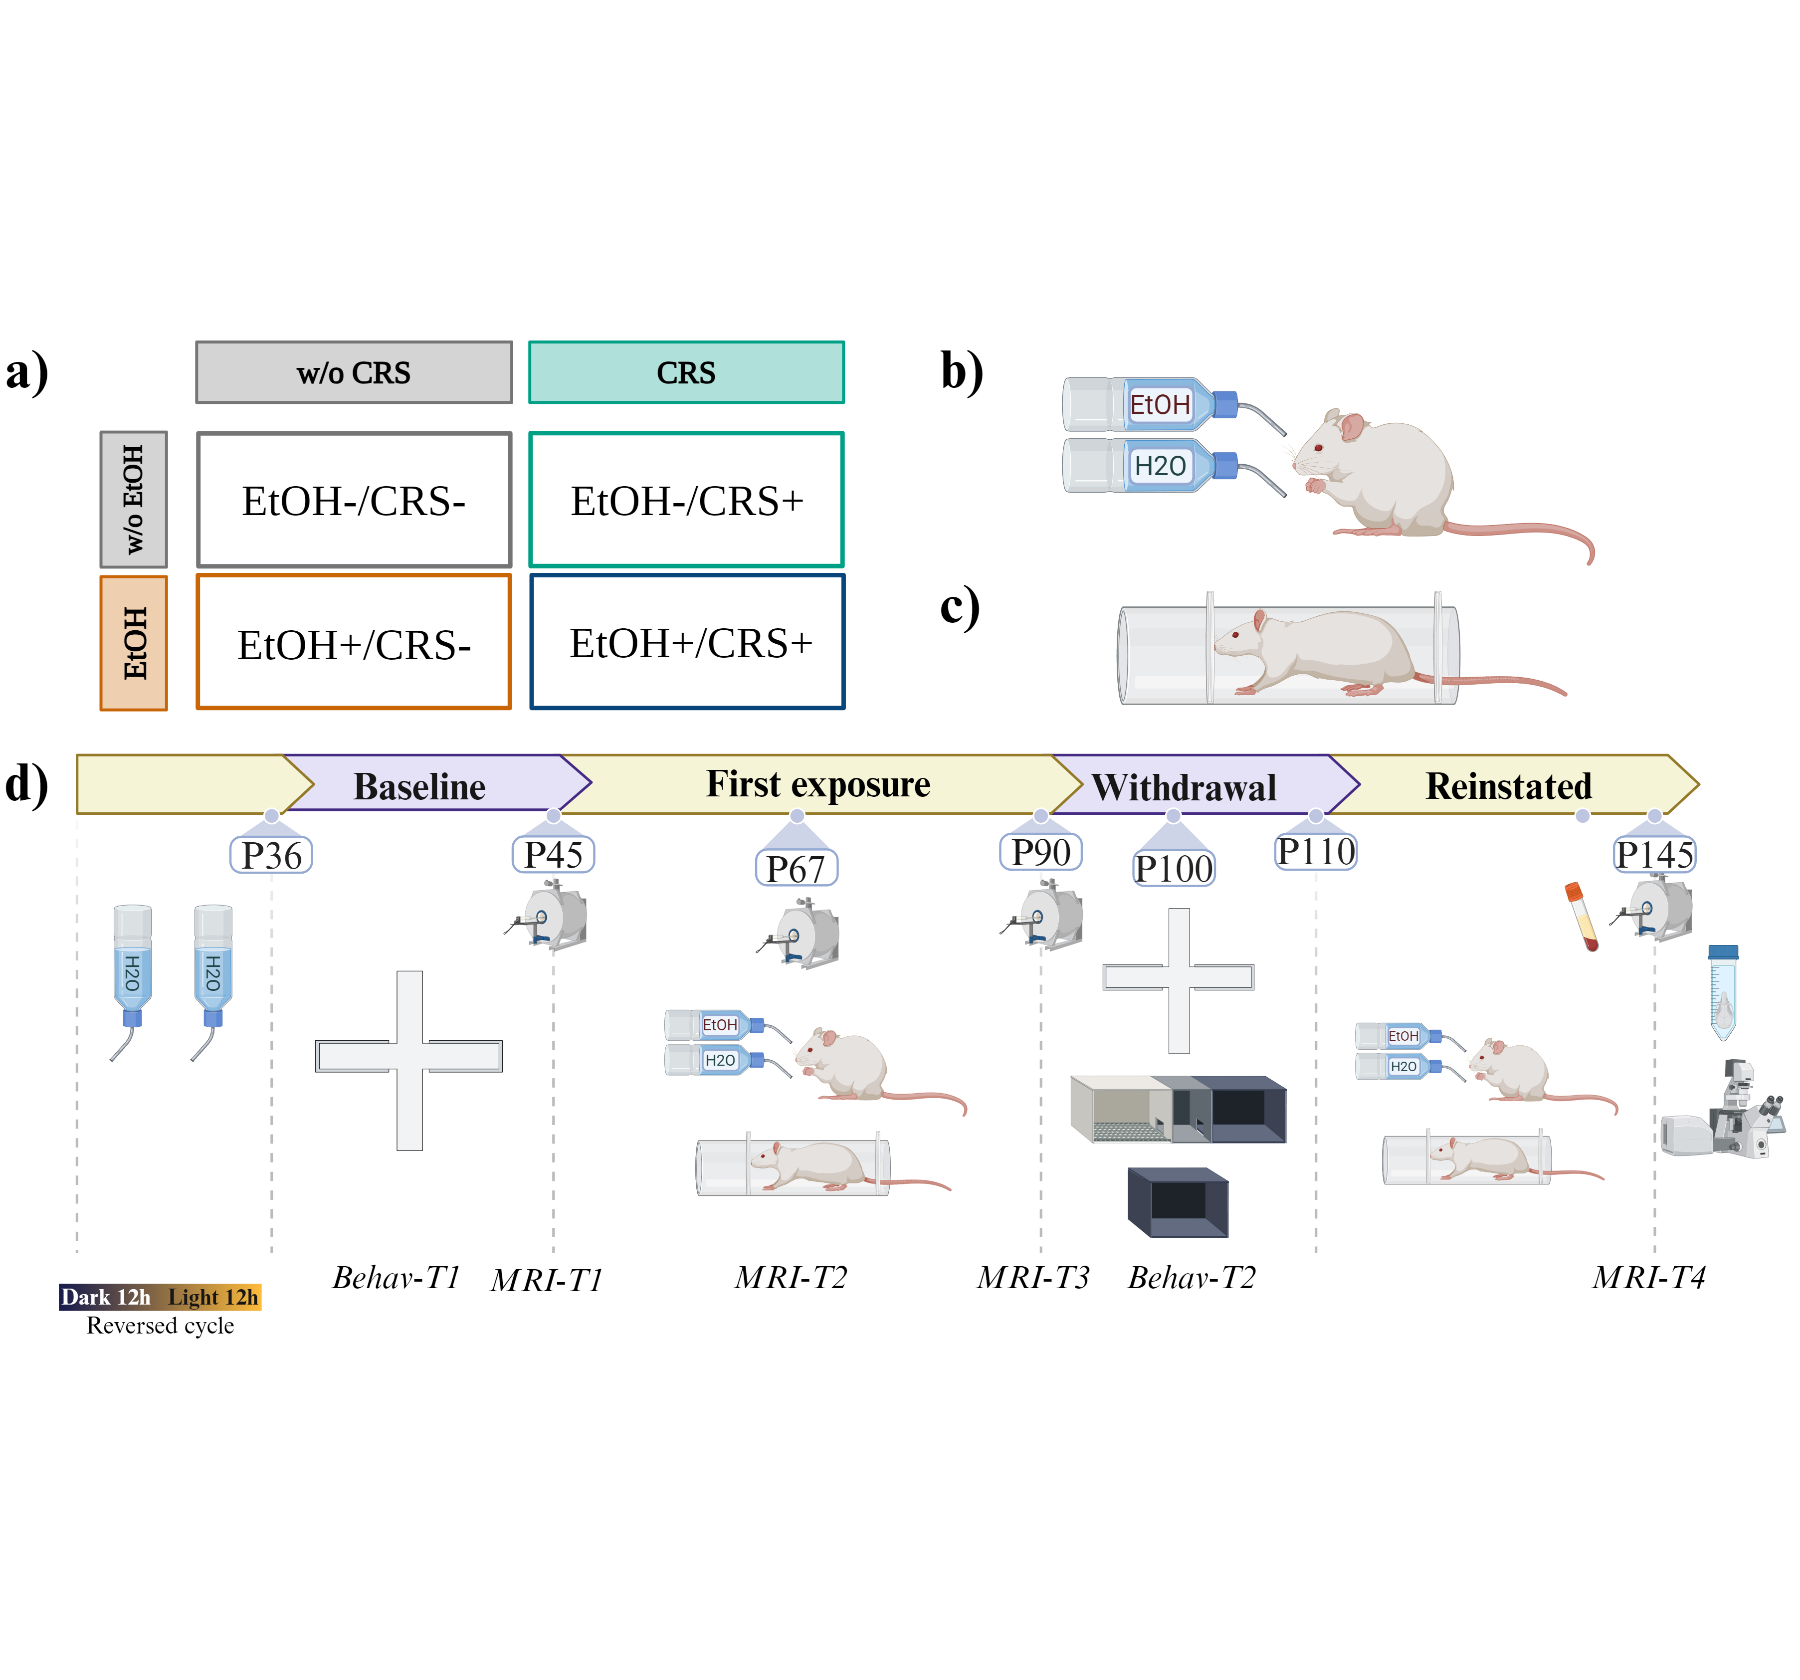

In [9]:
Fig.Design <- ggarrange(rasterGrob(Design))
Fig.Design

### **Figure for Alcohol consumption**

In [10]:
data_ends_M <- rbind.data.frame(Alcohol_intake) %>% 
    filter(Phase == "Relapse", Session == 15, Sex == "male") %>% 
    group_by(Group,Session) %>% summarise(main_intake = mean(main_intake, na.rm = T)) %>% pull(main_intake) %>% round(3)
data_ends_M
data_ends_F <- rbind.data.frame(Alcohol_intake) %>% 
    filter(Phase == "Relapse", Session == 15, Sex == "female") %>% 
    group_by(Group,Session) %>% summarise(main_intake = mean(main_intake, na.rm = T)) %>% pull(main_intake) %>% round(3)
data_ends_F

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


[1] 4.222 4.004

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


[1] 2.468 2.118

In [11]:
sddata_ends <- rbind.data.frame(Alcohol_intake) %>% 
    filter(Phase == "Relapse", Session == 15) %>% 
    group_by(Group,Session) %>% summarise(main_intake = sd(main_intake, na.rm = T)) %>% pull(main_intake) %>% round(3)

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


In [12]:
plot_class.Model_M <- Alcohol_intake %>% filter(Phase == "Model", Sex == "male") %>%
       ggline(x = "Session", y =  "main_intake", group = "Group", point.size = 2,
              add = c("mean_se"), size=1.5, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Ethanol intake (g/kg/24 hrs)", xlab = "Sessions") +
       annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(8.2) , ymax=c(8.6), alpha=0.8, fill=pal_sex[2]) +
       annotate(geom = "text", x = 10, y = 8.4,label = "First exposure phase", size = 5, fontface = 2, colour = "white") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
              legend.position = "none") + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              theme_settings + 
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = significant_sessions_M %>% filter(Phase == "Model", Sex == "male"), 
       aes(x = Session, y = 7.35, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_class.Model_M <- ggpar(plot_class.Model_M,ylim = c(0,8.2))

plot_class.Model_F <- Alcohol_intake %>% filter(Phase == "Model", Sex == "female") %>%
       ggline(x = "Session", y =  "main_intake", group = "Group", point.size = 2,
              add = c("mean_se"), size=1.5, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Ethanol intake (g/kg/24 hrs)", xlab = "Sessions") +
       annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(8.2) , ymax=c(8.6), alpha=0.8, fill=pal_sex[1]) +
       annotate(geom = "text", x = 10, y = 8.4,label = "First exposure phase", size = 5, fontface = 2, colour = "white") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")), #axis.title.x = element_blank(),
              legend.position = "none") + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              theme_settings + 
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = significant_sessions_F %>% filter(Phase == "Model", Sex == "female"), 
       aes(x = Session, y = 5.35, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_class.Model_F <- ggpar(plot_class.Model_F,ylim = c(0,8.2))

In [13]:
plot_class.Relapse_M <- Alcohol_intake %>% filter(Phase == "Relapse", Sex == "male") %>% 
    mutate(Session = factor(Session, levels = c(seq(1:15)))) %>% 
    ggline(x = "Session", y =  "main_intake", group = "Group", point.size = 2,
        add = c("mean_se"), size=1.5, color = "Group", palette = pal_group[c(2,4)],
        legend.title = "Group", 
        ylab = "Ethanol intake (g/kg/24 hrs)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(8.2) , ymax=c(8.6), alpha=0.8, fill=pal_sex[2]) +
    annotate(geom = "text", x = 7.5, y = 8.4,label = "Reinstated phase", size = 5, fontface = 2, colour = "white") +
    #scale_y_continuous(sec.axis = sec_axis(~ ., breaks = data_ends_M)) +
    annotate(geom = "point", x = 15, y = data_ends_M[1], colour = "red", size = 3) +
    annotate(geom = "point", x = 15, y = data_ends_M[2], colour = "red", size = 3) +
    theme(axis.text.y.left = element_blank(),axis.title.y.left = element_blank(),
        axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
        axis.line.y = element_blank(),
        axis.ticks.y = element_blank(), #axis.title.x = element_blank(),
        legend.position = "none") + 
    theme_settings + 
        scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), 15, by = 3),15)) +
    geom_text(data = significant_sessions_M %>% filter(Phase == "Relapse", Sex == "male"), 
    aes(x = Session, y = 7.35, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_class.Relapse_M <- ggpar(plot_class.Relapse_M,ylim = c(0,8.2))

plot_class.Relapse_F <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Relapse", Sex == "female") %>% 
    mutate(Session = factor(Session, levels = c(seq(1:15)))) %>% 
    ggline(x = "Session", y =  "main_intake", group = "Group", point.size = 2,
        add = c("mean_se"), size=1.5, color = "Group", palette = pal_group[c(2,4)],
        legend.title = "Group", 
        ylab = "Ethanol intake (g/kg/24 hrs)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(8.2) , ymax=c(8.6), alpha=0.8, fill=pal_sex[1]) +
    annotate(geom = "text", x = 7.5, y = 8.4,label = "Reinstated phase", size = 5, fontface = 2, colour = "white") +
    #scale_y_continuous(sec.axis = sec_axis(~ ., breaks = data_ends_F)) +
    annotate(geom = "point", x = 15, y = data_ends_F[1], colour = "red", size = 3) +
    annotate(geom = "point", x = 15, y = data_ends_F[2], colour = "red", size = 3) +
    theme(axis.text.y.left = element_blank(),axis.title.y.left = element_blank(),
        axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
        axis.line.y = element_blank(),axis.ticks.y = element_blank(), #axis.title.x = element_blank(),
        legend.position = "none") + 
    theme_settings + 
        scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), 15, by = 3),15)) +
    geom_text(data = significant_sessions_F %>% filter(Phase == "Relapse", Sex == "female"), 
    aes(x = Session, y = 5.35, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_class.Relapse_F <- ggpar(plot_class.Relapse_F,ylim = c(0,8.2))

In [14]:
plot_pref.Model_M <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Model", Sex == "male") %>% 
       ggline(x = "Session", y =  "Preferency", group = "Group", point.size = 1,
              add = c("mean_se"), size=1.2, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Preferency index", xlab = "Sessions") +
       annotate(geom = "text", x = 10, y = 0.62,label = "First exposure phase", size = 5, fontface = 2, colour = "Black") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
              legend.position = "none", text = element_text(size=18,family = "Times New Roman")) + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              #theme_settings  +
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = significant_pref_sessions_M %>% filter(Phase == "Model", Sex == "male"), 
              aes(x = Session, y = 0.475, label = p.value.signif), size = 4.5, vjust = -1, fontface = "bold")
plot_pref.Model_M <- ggpar(plot_pref.Model_M,ylim = c(0,0.62))

plot_pref.Relapse_M <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Relapse", Sex == "male") %>% 
       mutate(Session = factor(Session, levels = c(seq(1:15)))) %>%
       ggline(x = "Session", y =  "Preferency", group = "Group", point.size = 1,
              add = c("mean_se"), size=1.2, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Preferency index", xlab = "Sessions") +
       annotate(geom = "text", x = 8, y = 0.62,label = "Reinstated phase", size = 5, fontface = 2, colour = "Black") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
              legend.position = "none", text = element_text(size=18,family = "Times New Roman")) + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              #theme_settings  +
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = significant_pref_sessions_M %>% filter(Phase == "Relapse", Sex == "male"), 
              aes(x = Session, y = 0.475, label = p.value.signif), size = 4.5, vjust = -1, fontface = "bold")
plot_pref.Relapse_M <- ggpar(plot_pref.Relapse_M,ylim = c(0,0.62))

plot_pref.Model_F <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Model", Sex == "female") %>% 
       ggline(x = "Session", y =  "Preferency", group = "Group", point.size = 1,
              add = c("mean_se"), size=1.2, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Preferency index", xlab = "Sessions") +
       annotate(geom = "text", x = 10, y = 0.62,label = "First exposure phase", size = 5, fontface = 2, colour = "Black") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")), #axis.title.x = element_blank(),
              legend.position = "none", text = element_text(size=18,family = "Times New Roman")) + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              #theme_settings +
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = significant_pref_sessions_F %>% filter(Phase == "Model", Sex == "female"), 
              aes(x = Session, y = 0.3, label = p.value.signif), size = 4.5, vjust = -1, fontface = "bold")
plot_pref.Model_F <- ggpar(plot_pref.Model_F,ylim = c(0,0.62))

plot_pref.Relapse_F <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Relapse", Sex == "female") %>% 
       mutate(Session = factor(Session, levels = c(seq(1:15)))) %>%
       ggline(x = "Session", y =  "Preferency", group = "Group", point.size = 1,
              add = c("mean_se"), size=1.2, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Preferency index", xlab = "Sessions") +
       annotate(geom = "text", x = 8, y = 0.62,label = "Reinstated phase", size = 5, fontface = 2, colour = "Black") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
              legend.position = "none", text = element_text(size=18,family = "Times New Roman")) + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              #theme_settings  +
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = significant_pref_sessions_F %>% filter(Phase == "Relapse", Sex == "female"), 
              aes(x = Session, y = 0.3, label = p.value.signif), size = 4.5, vjust = -1, fontface = "bold")
plot_pref.Relapse_F <- ggpar(plot_pref.Relapse_F,ylim = c(0,0.62))

In [15]:
sum_alc_all_M <- Alcohol_intake %>% filter(Sex == "male") %>%
  ggplot(aes(x = Group,y = main_intake, 
            fill = Group)) + 
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab(NULL) + ylab(NULL) + 
  scale_color_manual(values = pal_group[c(2,4)]) +
  scale_fill_manual(values = pal_group[c(2,4)]) +
  # geom_half_point(side = "l", aes(color = Group, fill = Group),
  #                 range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none",
                      axis.line = element_blank()) + scale_x_discrete(labels = NULL, breaks = NULL) +
  theme_settings 
sum_alc_all_M <- ggpar(sum_alc_all_M,ylim = c(0,8.2)) +
  theme(axis.title = element_blank(), 
        axis.text = element_blank(), 
        axis.ticks = element_blank()) + scale_y_discrete(labels = NULL, breaks = NULL)

sum_alc_all_F <- Alcohol_intake %>% filter(Sex == "female") %>%
  ggplot(aes(x = Group,y = main_intake, 
            fill = Group)) + 
  stat_halfeye(
      adjust = .8, width = .7, fill = "grey85",
      interval_colour = NA, 
      position = position_nudge(x = .01),
      aes(thickness = stat(f*n))) +
  xlab(NULL) + ylab(NULL) + 
  scale_color_manual(values = pal_group[c(2,4)]) +
  scale_fill_manual(values = pal_group[c(2,4)]) +
  # geom_half_point(side = "l", aes(color = Group, fill = Group),
  #                 range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none",
                      axis.line = element_blank()) + scale_x_discrete(labels = NULL, breaks = NULL) +
  theme_settings 
sum_alc_all_F <- ggpar(sum_alc_all_F,ylim = c(0,5.95)) +
  theme(axis.title = element_blank(), 
        axis.text = element_blank(), 
        axis.ticks = element_blank()) + scale_y_discrete(labels = NULL, breaks = NULL)

In [16]:
plot_pref_M <- (plot_pref.Model_M + xlab(NULL) + ylab(NULL) + 
        theme(plot.tag = element_text(size = 22, face = "bold",family = "Times New Roman"))) / (plot_pref.Relapse_M)
plot_pref_F <- (plot_pref.Model_F + xlab(NULL) + ylab(NULL) + 
        theme(plot.tag = element_text(size = 22, face = "bold",family = "Times New Roman"))) / (plot_pref.Relapse_F )

In [17]:
consumption_final_clss_M <- ( ( ((plot_class.Model_M + theme(plot.tag = element_text(size = 24, face = "bold", family = "Times New Roman"))) + 
    plot_class.Relapse_M)  + 
    plot_pref_M) +
    plot_layout(widths = c(1.2,0.95,0.85),ncol = 3)) +
    plot_annotation(tag_levels = list(c("a)", "", "b)", "")) ) & theme(plot.margin = unit(c(0.2, 0.5, 0.2, 0.2), "lines"))

consumption_final_clss_F <- ( ( ((plot_class.Model_F + theme(plot.tag = element_text(size = 24, face = "bold", family = "Times New Roman"))) + 
    plot_class.Relapse_F) + 
    plot_pref_F) +
    plot_layout(widths = c(1.2,0.95,0.85),ncol = 3)) +
    plot_annotation(tag_levels = list(c("c)", "", "d)", "")) ) & theme(plot.margin = unit(c(0.2, 0.5, 0.2, 0.2), "lines"))

In [18]:
legd_Int <- as_ggplot(get_legend(Alcohol_intake %>% mutate(Group = case_when(Group == "Alc" ~ "EtOH+/CRS-", Group == "Alc+Str" ~ "EtOH+/CRS+")) %>% 
       ggline(x = "Session", y =  "main_intake", group = "Group", point.size = 2,
              add = c("mean_se"), size=1.5, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Ethanol intake (g/kg/24 hrs)", xlab = "Sessions") + theme(legend.text = element_text(size = 16), legend.title=element_blank()) )) 


In [19]:
theme_margin <- theme(plot.margin = unit(c(0.4, 1, 0.4, 0.4,0.4), "lines"))

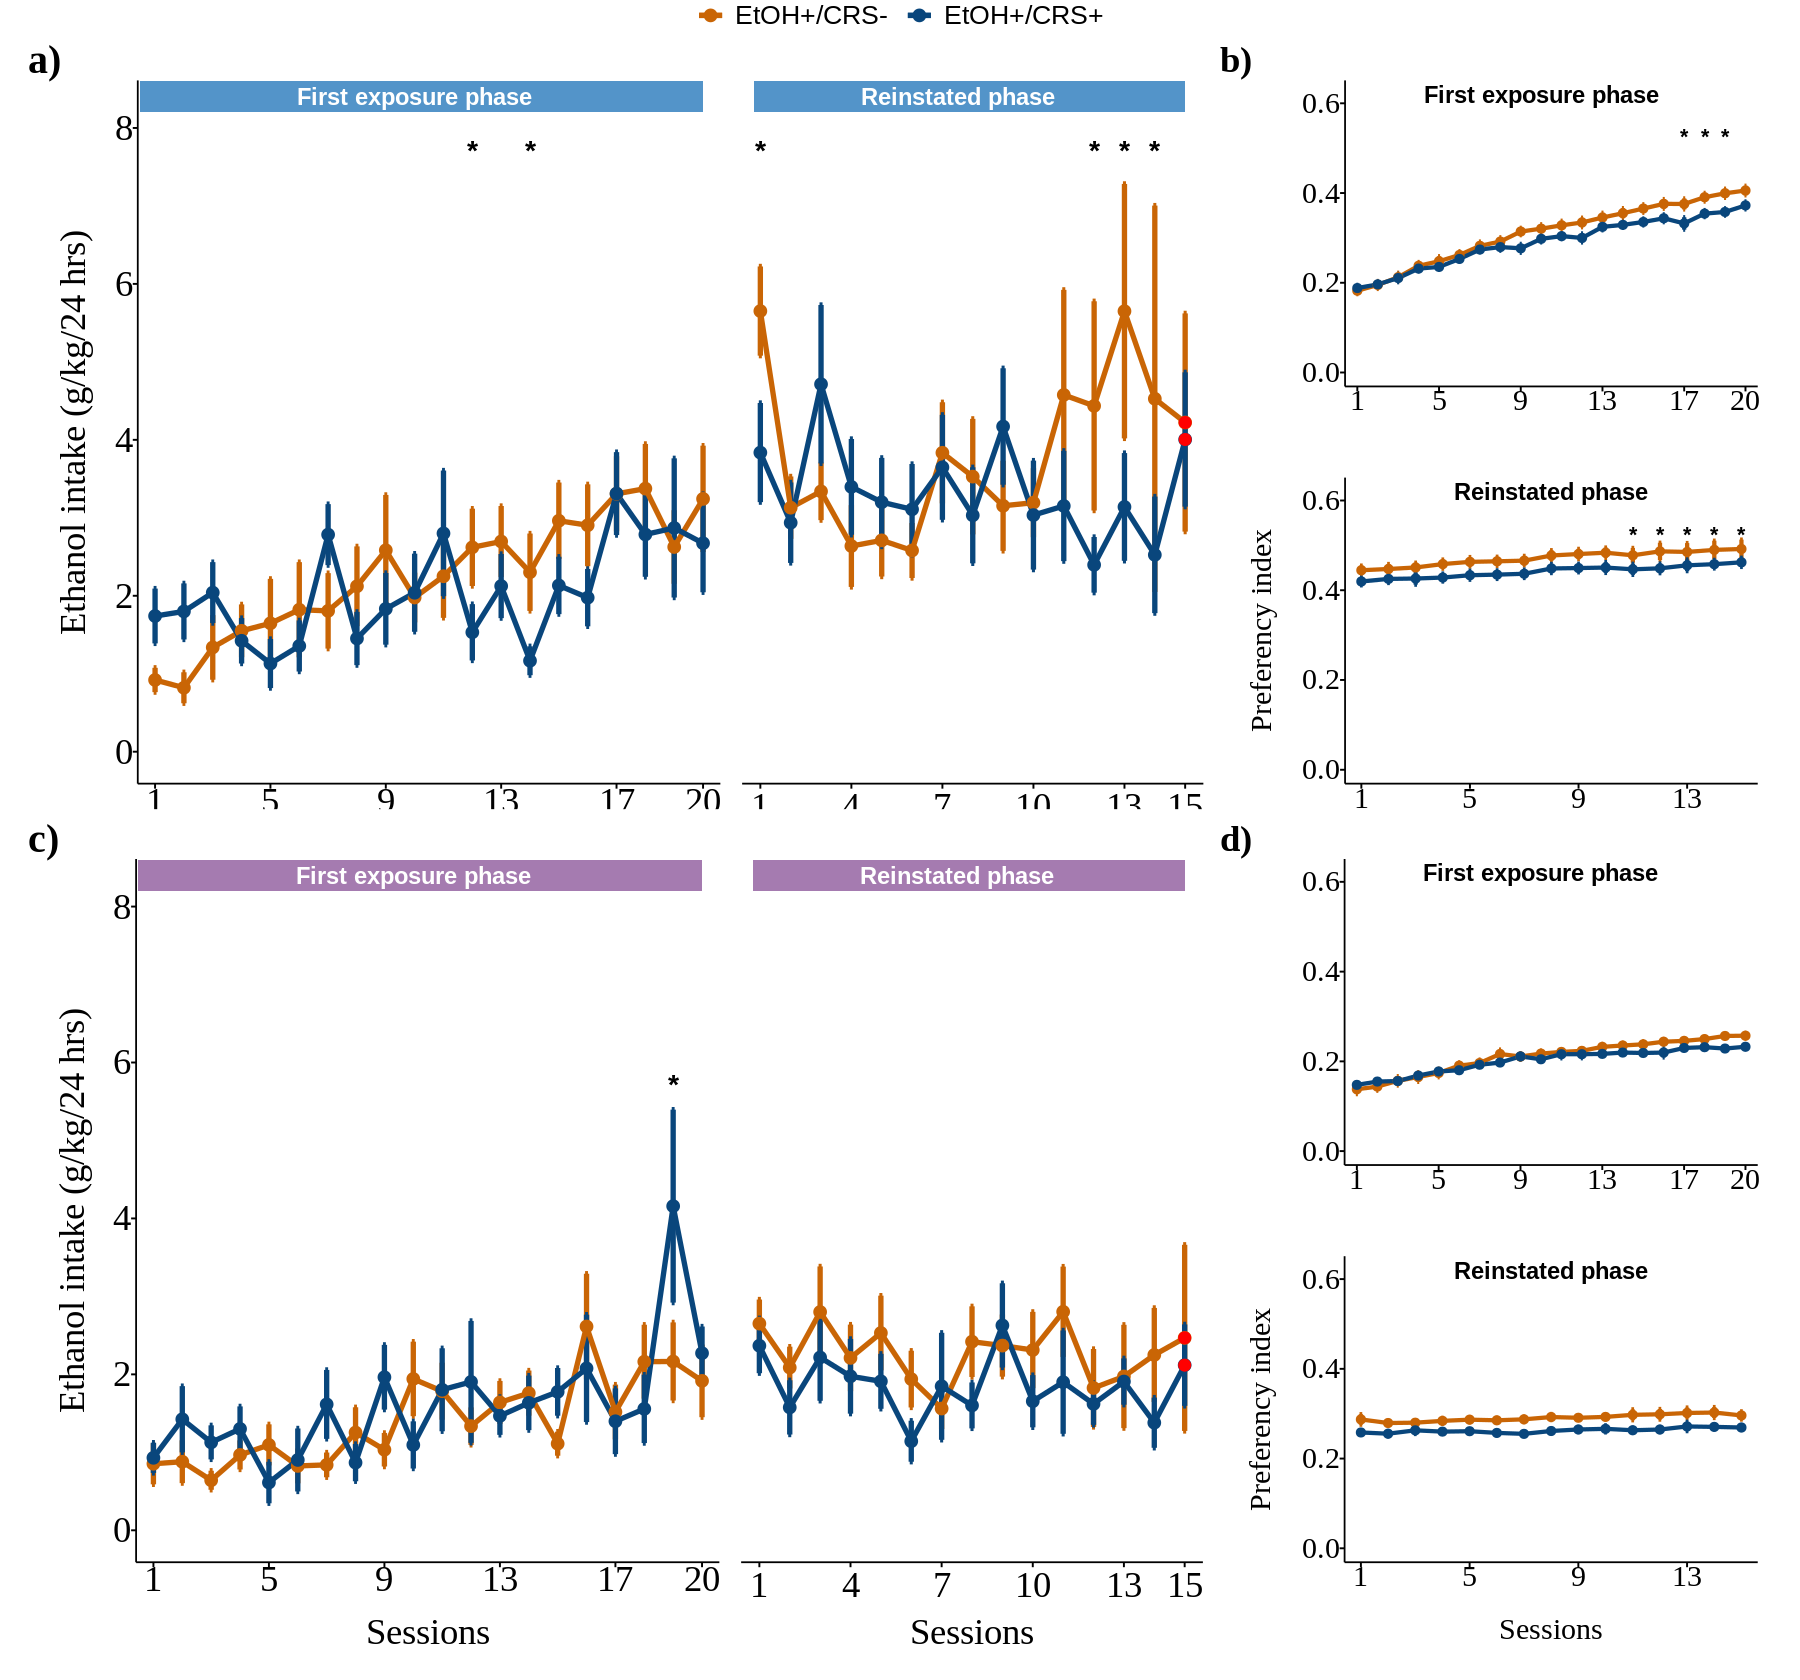

In [20]:
consumption_final <- legd_Int + wrap_elements(consumption_final_clss_M) + plot_spacer() + wrap_elements(consumption_final_clss_F) + 
    plot_layout(heights = c(0.025,1.7,-0.22,1.7),ncol = 1)
consumption_final

#### Binge

In [21]:
datab_ends <- rbind.data.frame(Alcohol_intake) %>% 
    filter(Phase == "Relapse", Session == 15) %>% 
    group_by(Group,Session) %>% summarise(Binge = mean(Binge, na.rm = T)) %>% pull(Binge) %>% round(3)
datab_ends

`summarise()` has grouped output by 'Group'. You can override using the
`.groups` argument.


[1] 0.461 0.499

In [22]:
plot_class.Binge <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Model") %>%
       ggline(x = "Session", y =  "Binge", group = "Group", point.size = 3,
              add = c("mean_se"), size=2, color = "Group", palette = pal_group[c(2,4)],
              legend.title = "Group", 
              ylab = "Binge intake (g/kg/30 min)", xlab = "Sessions")  +
       annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(1.5) , ymax=c(1.6), alpha=0.3, fill="#5C8A74") +
       annotate(geom = "text", x = 10, y = 1.55,label = "First exposure phase", size = 5, fontface = 2) +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              legend.position = "none",
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
              legend.text = element_text(size=21, family = "Times New Roman")) + theme_settings
plot_class.Binge <- ggpar(plot_class.Binge,ylim = c(0,1.6))

In [23]:
plot_class.Binge.Relapse <- rbind.data.frame(Alcohol_intake) %>% filter(Phase == "Relapse") %>%
    ggline(x = "Session", y =  "Binge", group = "Group", point.size = 3,
           add = c("mean_se"), size=2, color = "Group", palette = pal_group[c(2,4)],
           legend.title = "Group", 
           ylab = "Binge intake (g/kg/24 hrs)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(2.95) , ymax=c(3.15), alpha=0.3, fill="#668DB5") +
    annotate(geom = "text", x = 8, y = 3.05,label = "Relapse phase", size = 5, fontface = 2) +
    scale_y_continuous(sec.axis = sec_axis(~ ., breaks = datab_ends)) +
    annotate(geom = "point", x = 15, y = 0.461, colour = "orange", size = 3) +
    annotate(geom = "point", x = 15, y = 0.499, colour = "orange", size = 3) +
    theme(axis.title.y.left = element_blank(),axis.text.y.left = element_blank(),
          legend.position = "none",
          axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
          axis.line.y = element_blank(),axis.ticks.y = element_blank() ) + 
    theme_settings
plot_class.Binge.Relapse <- ggpar(plot_class.Binge.Relapse,ylim = c(0,3.2))

### Weight

In [24]:
plot_weight.Model_M <- Weight_intake %>% filter(Phase == "Model", Sex == "male") %>%
       ggline(x = "Session", y =  "Weight_change", group = "Group", point.size = 2,
              add = c("mean_se"), size=1.5, color = "Group", palette = pal_group,
              legend.title = "Group", 
              ylab = "Δ Weight (gr)", xlab = "Sessions") +
       annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[2]) +
       annotate(geom = "text", x = 10, y = 0.37,label = "First exposure phase", size = 5, fontface = 2, colour = "white") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
              legend.position = "none") + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              theme_settings + 
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = Wsignificant_sessions_M %>% filter(Phase == "Model", Sex == "male"), 
       aes(x = Session, y = 0.32, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_weight.Model_M <- ggpar(plot_weight.Model_M,ylim = c(0,0.36))

plot_weight.Model_F <- Weight_intake %>% filter(Phase == "Model", Sex == "female") %>%
       ggline(x = "Session", y =  "Weight_change", group = "Group", point.size = 2,
              add = c("mean_se"), size=1.5, color = "Group", palette = pal_group,
              legend.title = "Group", 
              ylab = "Δ Weight (gr)", xlab = "Sessions") +
       annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[1]) +
       annotate(geom = "text", x = 10, y = 0.37,label = "First exposure phase", size = 5, fontface = 2, colour = "white") +
       theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
              axis.text.x.bottom = element_text(margin = margin(b = 10)),
              axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")), #axis.title.x = element_blank(),
              legend.position = "none") + 
              #legend.text = element_text(size=21, family = "Times New Roman")) + 
              theme_settings + 
       scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), max(Alcohol_intake$Session %>% as.numeric()), by = 4),20)) +
       geom_text(data = Wsignificant_sessions_F %>% filter(Phase == "Model", Sex == "female"), 
       aes(x = Session, y = 0.32, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_weight.Model_F <- ggpar(plot_weight.Model_F,ylim = c(0,0.36))

In [25]:
plot_weight.Relapse_M <- Weight_intake %>% filter(Phase == "Relapse", Sex == "male") %>% 
    mutate(Session = factor(Session, levels = c(seq(1:15)))) %>% 
    ggline(x = "Session", y =  "Weight_change", group = "Group", point.size = 2,
        add = c("mean_se"), size=1.5, color = "Group", palette = pal_group,
        legend.title = "Group", 
        ylab = "Δ Weight (gr)", xlab = "Sessions") + 
    annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[2]) +
    annotate(geom = "text", x = 7.5, y = 0.37,label = "Reinstated phase", size = 5, fontface = 2, colour = "white") +
    #scale_y_continuous(sec.axis = sec_axis(~ ., breaks = data_ends_M)) +
    theme(axis.text.y.left = element_blank(),axis.title.y.left = element_blank(),
        axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
        axis.line.y = element_blank(),
        axis.ticks.y = element_blank(), #axis.title.x = element_blank(),
        legend.position = "none") + 
    theme_settings + 
        scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), 15, by = 3),15)) +
    geom_text(data = Wsignificant_sessions_M %>% filter(Phase == "Relapse", Sex == "male"), 
    aes(x = Session, y = 0.32, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_weight.Relapse_M <- ggpar(plot_weight.Relapse_M,ylim = c(0,0.36))

plot_weight.Relapse_F <- Weight_intake %>% filter(Phase == "Relapse", Sex == "female") %>% 
    mutate(Session = factor(Session, levels = c(seq(1:15)))) %>% 
    ggline(x = "Session", y =  "Weight_change", group = "Group", point.size = 2,
        add = c("mean_se"), size=1.5, color = "Group", palette = pal_group,
        legend.title = "Group", 
        ylab = "Δ Weight (gr)", xlab = "Sessions") + 
        annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[1]) +
        annotate(geom = "text", x = 7.5, y = 0.37,label = "Reinstated phase", size = 5, fontface = 2, colour = "white") +
    #scale_y_continuous(sec.axis = sec_axis(~ ., breaks = data_ends_M)) +
    theme(axis.text.y.left = element_blank(),axis.title.y.left = element_blank(),
        axis.text.x = element_text(margin = margin(c(t = .12,b=12), unit = "cm")),
        axis.line.y = element_blank(),
        axis.ticks.y = element_blank(), #axis.title.x = element_blank(),
        legend.position = "none") + 
    theme_settings + 
        scale_x_discrete(breaks = c(seq(min(Alcohol_intake$Session %>% as.numeric()), 15, by = 3),15)) +
    geom_text(data = Wsignificant_sessions_F %>% filter(Phase == "Relapse", Sex == "female"), 
    aes(x = Session, y = 0.32, label = p.value.signif), size = 6, vjust = -1, fontface = "bold")
plot_weight.Relapse_F <- ggpar(plot_weight.Relapse_F,ylim = c(0,0.36))

In [26]:
mod_weight_M <- lmer(formula = Weight_change ~ Session*Group+Batch+(1|RID), 
        data = Weight_intake %>% mutate(Session = as.numeric(Session)) %>% filter(Phase == "Model", Sex == "male"))

plot_weight.Model_M <- 
        ggemmeans(mod_weight_M, terms = c("Session", "Group")) %>% 
        plot(show_data = FALSE, show_ci = FALSE, dot_size = 2, dot_alpha = 0.2) +
        labs(
        x = "Sessions",
        y = "Δ Weight (gr)") +
        theme_pubr() +
        geom_line(size = 1.5) +
        annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[2]) +
        annotate(geom = "text", x = 10, y = 0.37,label = "First exposure phase", size = 5, fontface = 2, colour = "white") +
        theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
                axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
                axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
                legend.position = "none", 
                plot.title = element_blank() ) + 
                theme_settings + 
        scale_color_manual(values = pal_group)
plot_weight.Model_M <- ggpar(plot_weight.Model_M,ylim = c(0,0.36), xlim = c(1,20))

mod_weight_F <- lmer(formula = Weight_change ~ Session*Group+Batch+(1|RID), 
        data = Weight_intake %>% mutate(Session = as.numeric(Session)) %>% filter(Phase == "Model", Sex == "female"))

plot_weight.Model_F <- 
        ggemmeans(mod_weight_F, terms = c("Session", "Group")) %>% 
        plot(show_data = FALSE, show_ci = FALSE, dot_size = 2, dot_alpha = 0.2) +
        labs(
        x = "Sessions",
        y = "Δ Weight (gr)") +
        theme_pubr() +
        geom_line(size = 1.5) +
        annotate("rect", xmin=c(0.47), xmax=c(20), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[1]) +
        annotate(geom = "text", x = 10, y = 0.37,label = "First exposure phase", size = 5, fontface = 2, colour = "white") +
        theme(axis.text.y.left = element_text(margin = margin(l = 10)),legend.title=element_blank(),
                axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
                axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
                legend.position = "none", 
                plot.title = element_blank() ) + 
                theme_settings + 
        scale_color_manual(values = pal_group)
plot_weight.Model_F <- ggpar(plot_weight.Model_F,ylim = c(0,0.36), xlim = c(1,20))

##### relapse

mod_weight_M_Relapse <- lmer(formula = Weight_change ~ Session*Group+Batch+(1|RID), 
        data = Weight_intake %>% mutate(Session = as.numeric(Session)) %>% filter(Phase == "Relapse", Sex == "male"))

plot_weight.Relapse_M <- 
        ggemmeans(mod_weight_M_Relapse, terms = c("Session", "Group")) %>% 
        plot(show_data = FALSE, show_ci = FALSE, dot_size = 2, dot_alpha = 0.2) +
        labs(
        x = "Sessions",
        y = "Δ Weight (gr)") +
        theme_pubr() +
        geom_line(size = 1.5) +
        annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[2]) +
        annotate(geom = "text", x = 7.5, y = 0.37,label = "Reinstated phase", size = 5, fontface = 2, colour = "white") +
        theme(axis.text.y.left = element_blank(),axis.title.y.left = element_blank(),
                axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
                axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
                axis.line.y = element_blank(),
                axis.ticks.y = element_blank(), #axis.title.x = element_blank(),
                legend.position = "none", 
                plot.title = element_blank()) + 
                theme_settings + 
        scale_color_manual(values = pal_group)
plot_weight.Relapse_M <- ggpar(plot_weight.Relapse_M,ylim = c(0,0.36), xlim = c(1,15))

mod_weight_F_Relapse <- lmer(formula = Weight_change ~ Session*Group+Batch+(1|RID), 
        data = Weight_intake %>% mutate(Session = as.numeric(Session)) %>% filter(Phase == "Relapse", Sex == "female"))

plot_weight.Relapse_F <- 
        ggemmeans(mod_weight_F_Relapse, terms = c("Session", "Group")) %>% 
        plot(show_data = FALSE, show_ci = FALSE, dot_size = 2.5, dot_alpha = 0.2) +
        labs(
        x = "Sessions",
        y = "Δ Weight (gr)") +
        theme_pubr() +
        geom_line(size = 1.5) +
        annotate("rect", xmin=c(0.8), xmax=c(15), ymin=c(0.36) , ymax=c(0.38), alpha=0.8, fill=pal_sex[1]) +
        annotate(geom = "text", x = 7.5, y = 0.37,label = "Reinstated phase", size = 5, fontface = 2, colour = "white") +
        theme(axis.text.y.left = element_blank(),axis.title.y.left = element_blank(),
                axis.text.x.bottom = element_text(margin = margin(b = 10)),#axis.title.x = element_blank(),
                axis.text.x = element_text(margin = margin(c(t = .12), unit = "cm")),
                axis.line.y = element_blank(),
                axis.ticks.y = element_blank(), #axis.title.x = element_blank(),
                legend.position = "none", 
                plot.title = element_blank()) + 
                theme_settings + 
        scale_color_manual(values = pal_group)
plot_weight.Relapse_F <- ggpar(plot_weight.Relapse_F,ylim = c(0,0.36), xlim = c(1,15))



Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


In [27]:
sum_weight_all_M <- Weight_intake %>% filter(Sex == "male") %>%
  ggplot(aes(x = Group,y = Weight_change, 
            fill = Group)) + 
  xlab(NULL) + ylab(NULL) + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  # geom_half_point(side = "l", aes(color = Group, fill = Group),
  #                 range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none",
                      axis.line = element_blank()) + scale_x_discrete(labels = NULL, breaks = NULL) +
  theme_settings 
sum_weight_all_M <- ggpar(sum_weight_all_M,ylim = c(0,0.36)) +
  theme(axis.title = element_blank(), 
        axis.text = element_blank(), 
        axis.ticks = element_blank()) 

sum_weight_all_F <- Weight_intake %>% filter(Sex == "female") %>%
  ggplot(aes(x = Group,y = Weight_change, 
            fill = Group)) + 
  xlab(NULL) + ylab(NULL) + 
  scale_color_manual(values = pal_group) +
  scale_fill_manual(values = pal_group) +
  # geom_half_point(side = "l", aes(color = Group, fill = Group),
  #                 range_scale = .1, alpha = .4, size = 3) +
  geom_boxplot(width = .2) +
  theme_pubr() + theme(legend.position = "none",
                      axis.line = element_blank()) + scale_x_discrete(labels = NULL, breaks = NULL) +
  theme_settings 
sum_weight_all_F <- ggpar(sum_weight_all_F,ylim = c(0,0.19)) +
  theme(axis.title = element_blank(), 
        axis.text = element_blank(), 
        axis.ticks = element_blank()) #+ scale_y_discrete(labels = NULL, breaks = NULL)

In [28]:
weight_final_clss_M <- ( ( (((plot_weight.Model_M + theme(plot.tag = element_text(size = 22, face = "bold", family = "Times New Roman"))) + 
        plot_weight.Relapse_M) +
        sum_weight_all_M) ) +
    plot_layout(widths = c(1.2,0.95, 0.4),ncol = 3)) +
    plot_annotation(tag_levels = list(c("a)", "", "", "b)")) ) & theme(plot.margin = unit(c(0.4, 1, 0.4, 0.4,0.4), "lines"))

weight_final_clss_F <- ( ( (((plot_weight.Model_F + theme(plot.tag = element_text(size = 22, face = "bold", family = "Times New Roman"))) + 
        plot_weight.Relapse_F) +
        sum_weight_all_F) ) +
    plot_layout(widths = c(1.2,0.95, 0.4),ncol = 3)) +
    plot_annotation(tag_levels = list(c("c)", "", "", "d)")) ) & theme(plot.margin = unit(c(0.4, 1, 0.4, 0.4,0.4), "lines"))

In [29]:
legd_weight <- as_ggplot(get_legend(Weight_intake %>% 
       mutate(Group = case_when(Group == "Ctrl" ~ "EtOH-/CRS-", Group == "Alc" ~ "EtOH+/CRS-", 
                     Group == "Str" ~ "EtOH-/CRS+",Group == "Alc+Str" ~ "EtOH+/CRS+"),
              Group = factor(Group, levels = c("EtOH-/CRS-", "EtOH+/CRS-", "EtOH-/CRS+", "EtOH+/CRS+"))) %>%  
       ggline(x = "Session", y =  "Weight_change", group = "Group", point.size = 2,
              add = c("mean_se"), size=1.5, color = "Group", palette = pal_group,
              legend.title = "Group", 
              ylab = "Δ Weight (gr)", xlab = "Sessions") + theme(legend.text = element_text(size = 16), legend.title=element_blank()) )) 

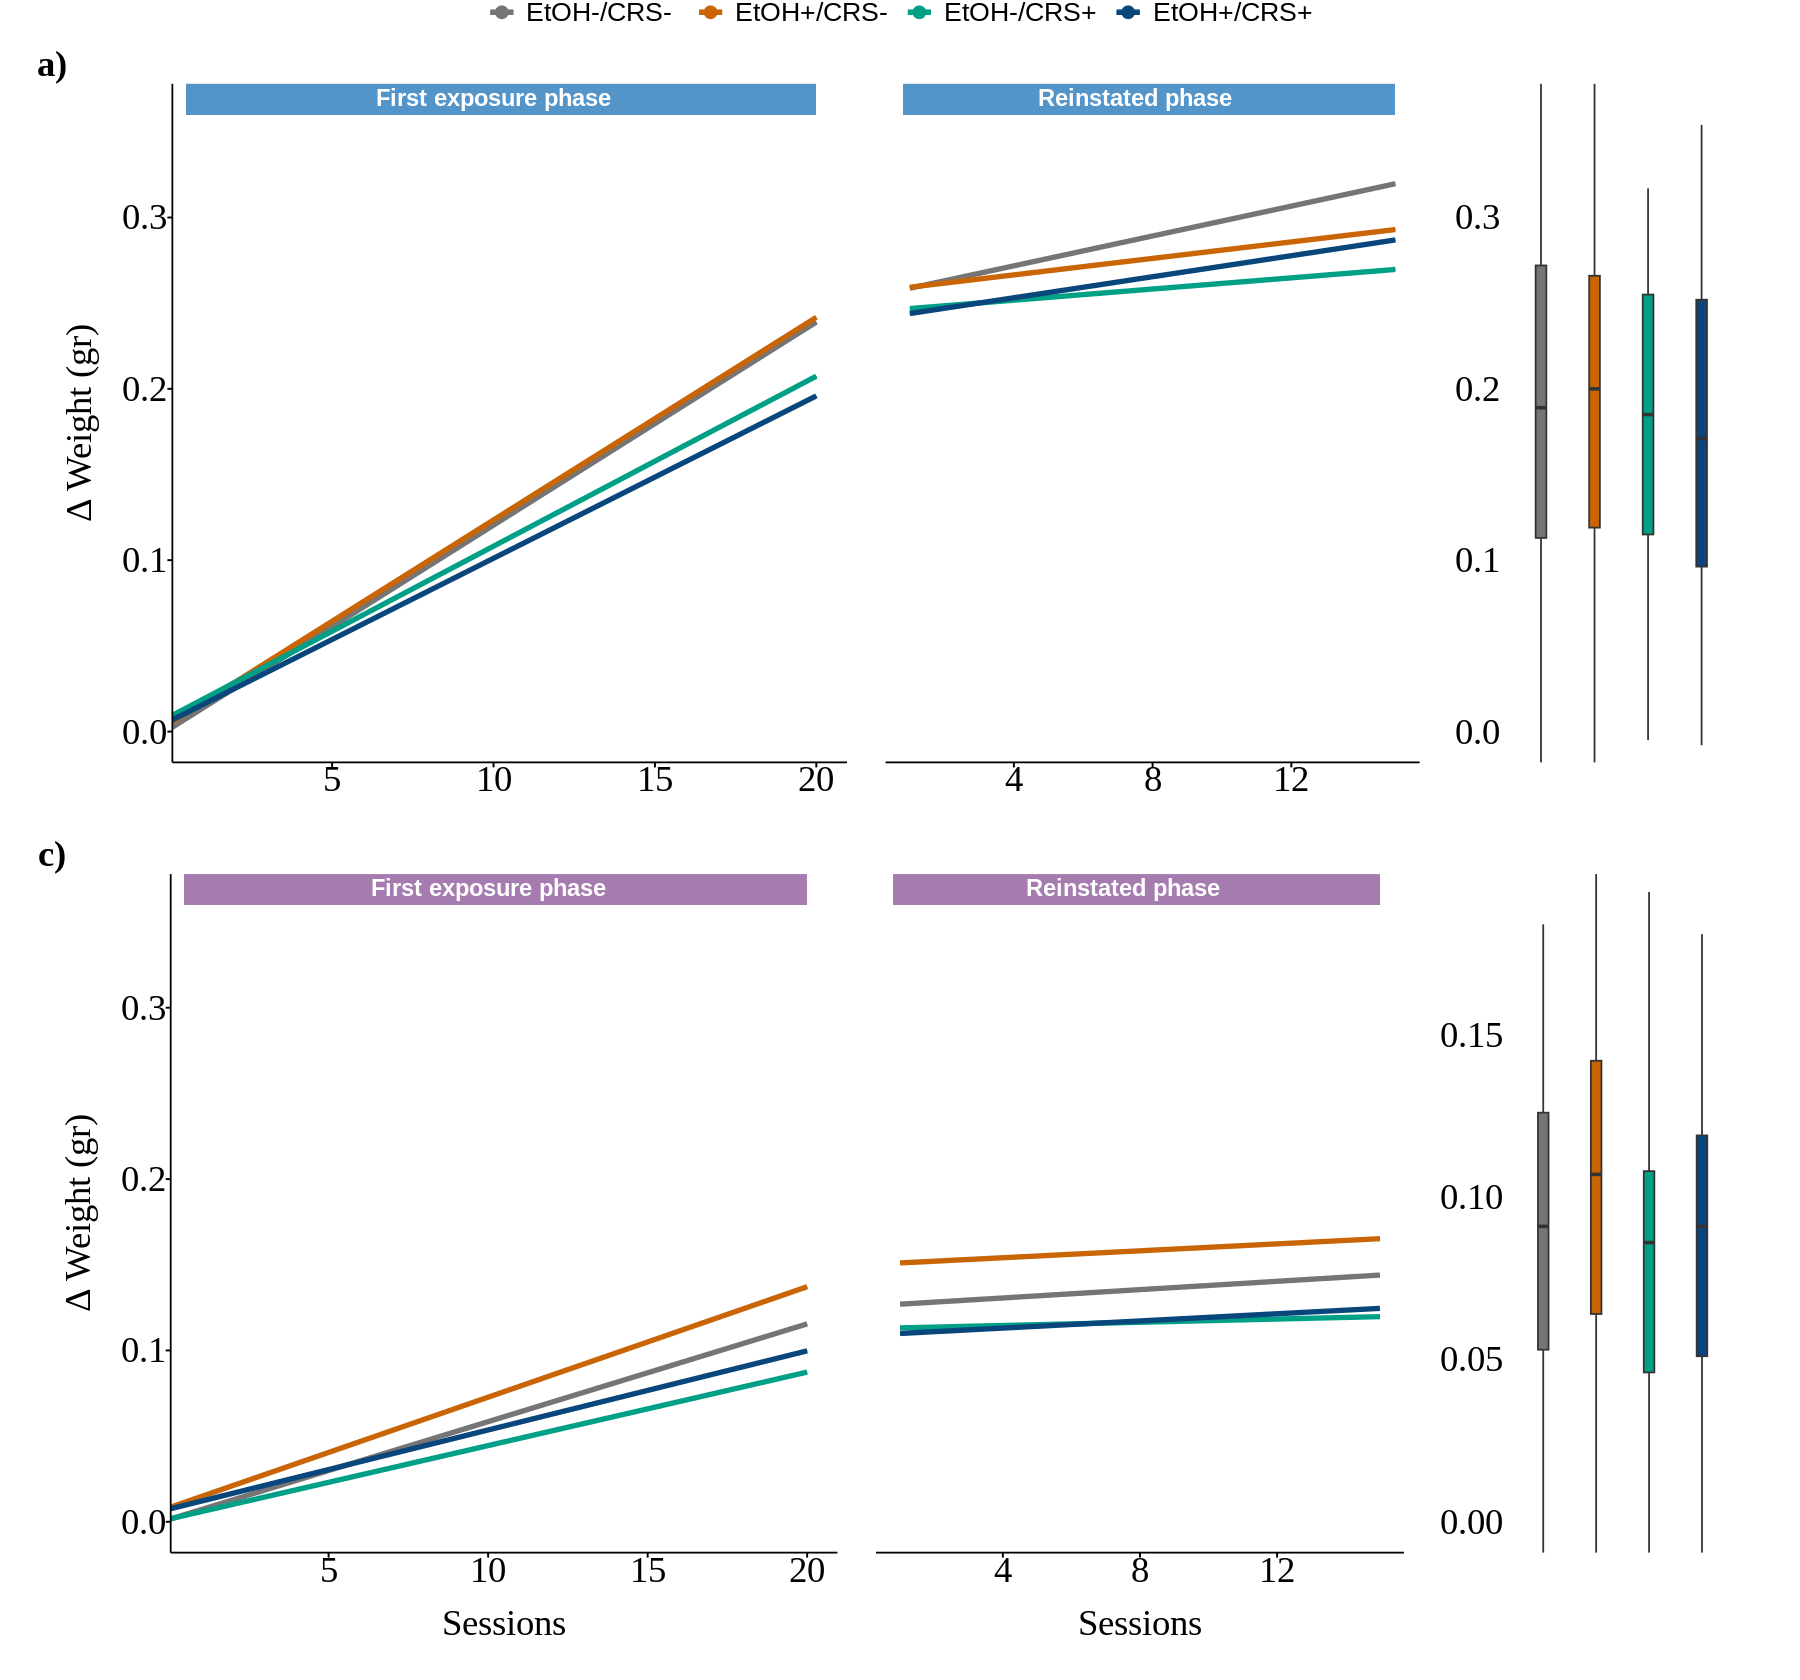

In [30]:
Weight_final <- legd_weight + wrap_elements(weight_final_clss_M) + plot_spacer() + wrap_elements(weight_final_clss_F) + 
    plot_layout(heights = c(0.015,2,-0.22,2),ncol = 1)
Weight_final

### **Figures of Behavior**

#### Deeplabcut labels

In [31]:
# Read png files
img <- readPNG("Figures/DLC/Labels.png")

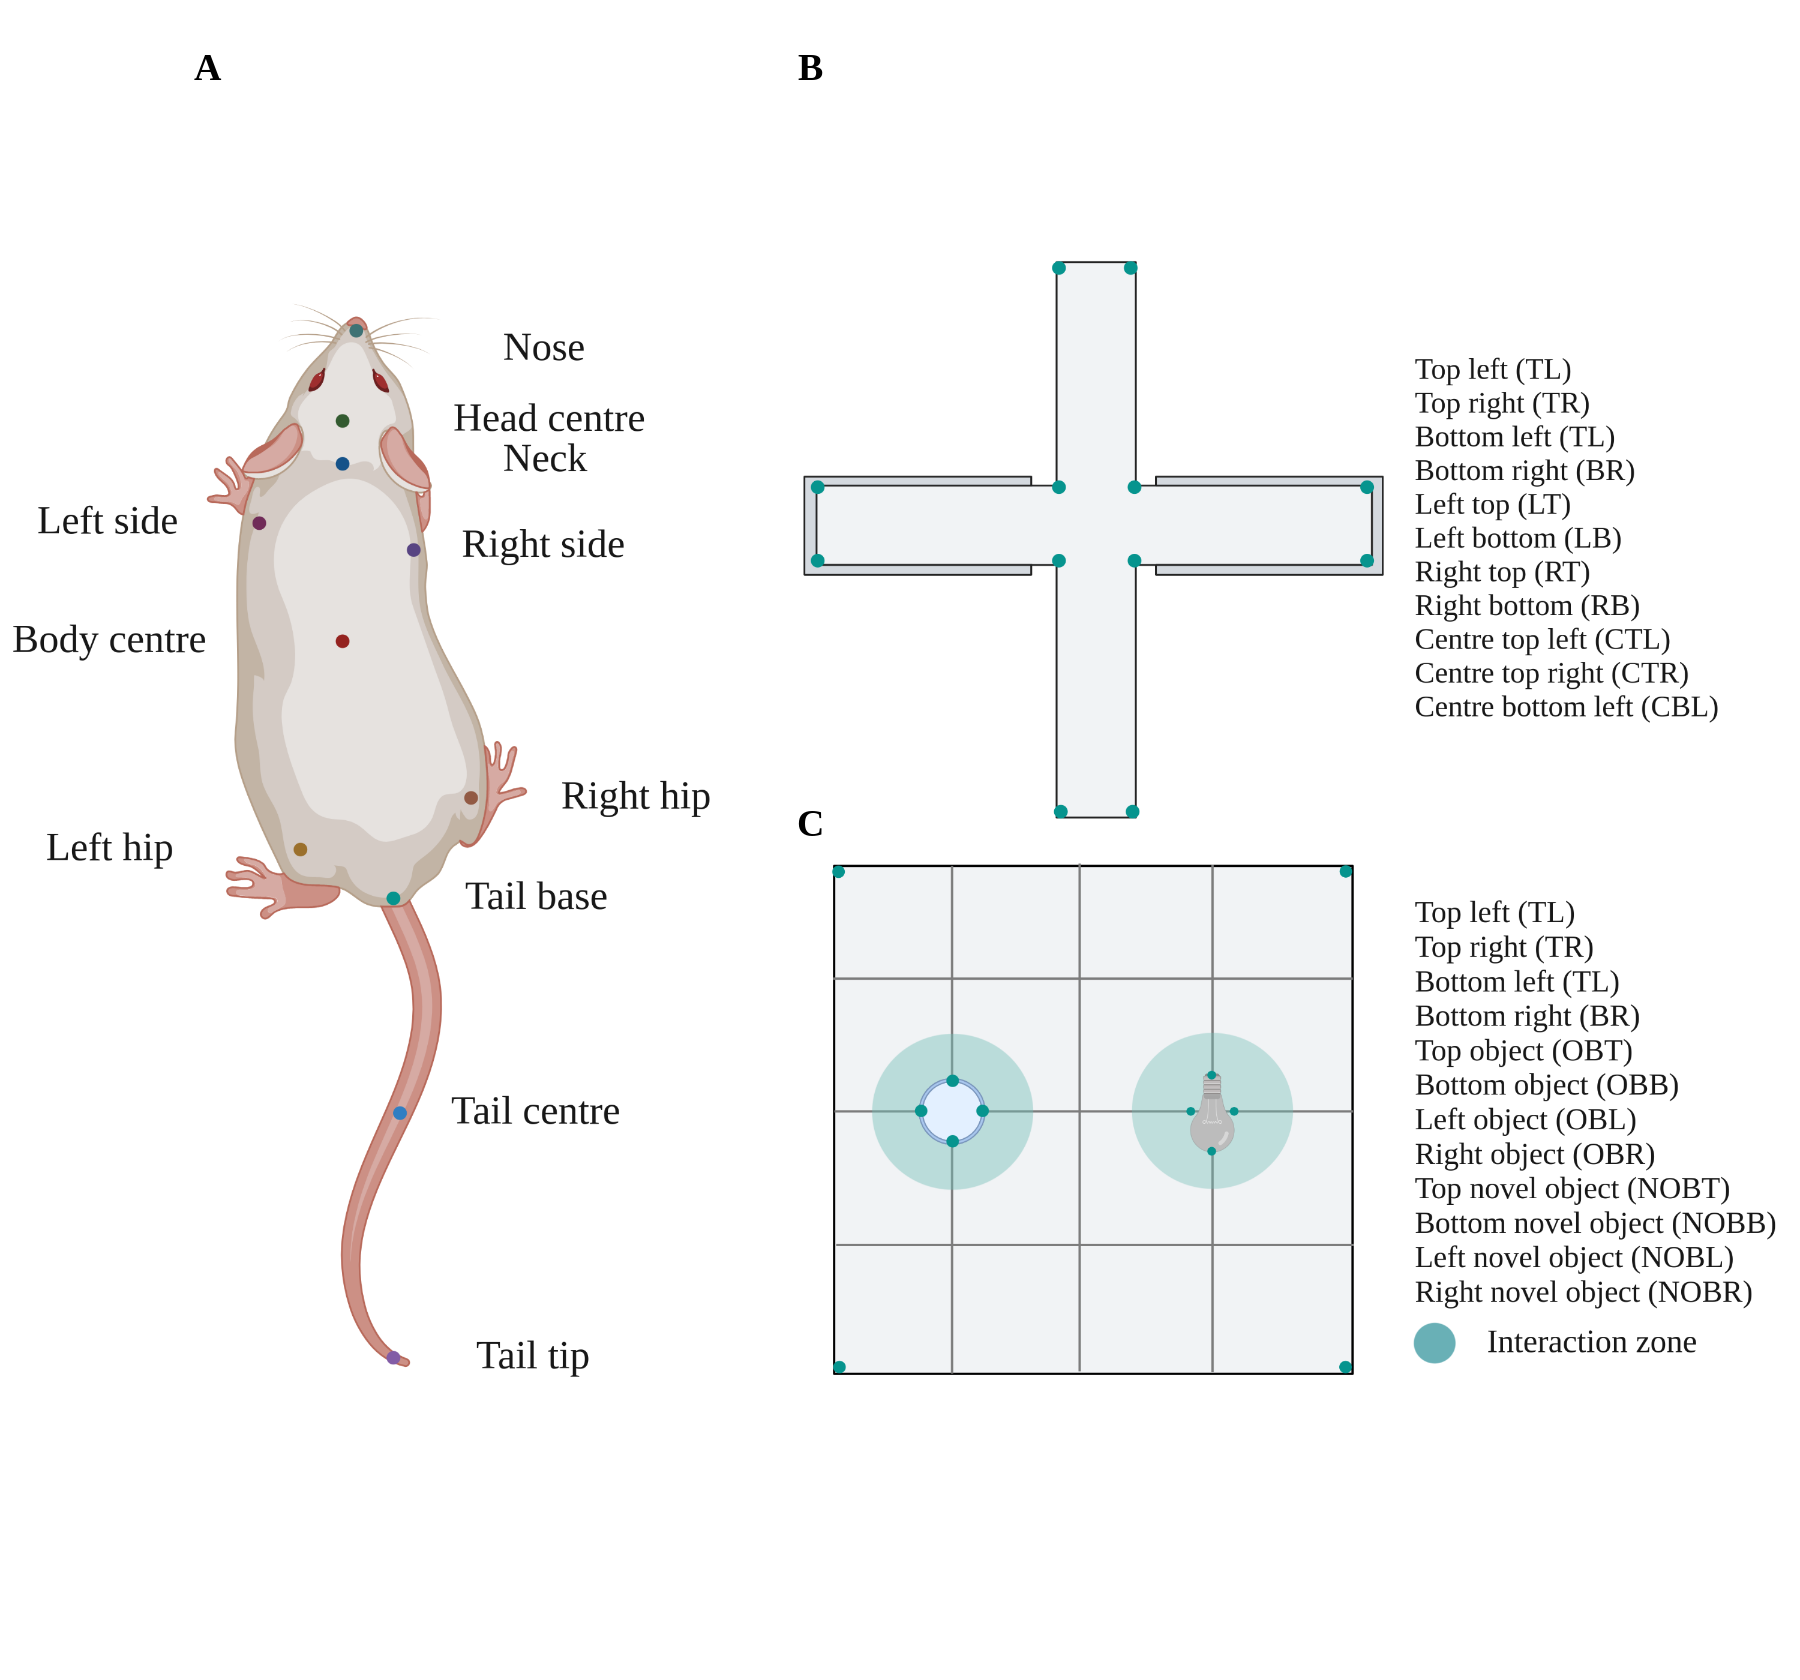

In [32]:
Fig.DLC <- ggarrange(rasterGrob(img)) +
    annotate(geom = "text", x = 0.115, y = 0.96,label = "A", size = 8, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.45, y = 0.51,label = "C", size = 8, fontface = 2, family = "Times New Roman") +
    annotate(geom = "text", x = 0.45, y = 0.96,label = "B", size = 8, fontface = 2, family = "Times New Roman")
Fig.DLC

In [33]:
EPM <- EPM_AI %>% select(RID,Group,Sex,Stage,Anxiety_index)
NOR <- NOR_II %>% select(RID,PI) %>% rename("Preference_index" = "PI")
CPP_PI <- CPP_PI %>% filter(Time == "Test") %>% select(RID,Group,Sex,Stage,PI) %>% rename("Preference_index_CPP" = "PI")

Behav <- EPM %>% left_join(NOR, by = "RID") %>% left_join(CPP_PI)

Joining with `by = join_by(RID, Group, Sex, Stage)`


In [34]:
BehaviorT1 <- Behav %>% filter(Stage == "T1") %>% select(-c(Preference_index)) %>%
    pivot_longer(c(Anxiety_index,Preference_index_CPP),names_to = "Behavior",values_to = "Behavior Score") %>%
    mutate(Behavior = factor(Behavior))

In [35]:
Behavior <- Behav %>% filter(Stage == "T2") %>%
    pivot_longer(c(Anxiety_index,Preference_index,Preference_index_CPP),names_to = "Behavior",values_to = "Behavior Score") %>%
    mutate(Behavior = factor(Behavior))

In [36]:
Behavior1 = BehaviorT1 %>% mutate(Behavior_sex = case_when(Behavior == "Anxiety_index" & Sex == "female" ~ "Anxiety_index_fem",
                                Behavior == "Anxiety_index" & Sex == "male" ~ "Anxiety_index_male",
                                Behavior == "Preference_index" & Sex == "female" ~ "Preference_index_fem",
                                Behavior == "Preference_index" & Sex == "male" ~ "Preference_index_male",
                                Behavior == "Preference_index_CPP" & Sex == "female" ~ "Preference_index_CPP_fem",
                                Behavior == "Preference_index_CPP" & Sex == "male" ~ "Preference_index_CPP_male"), .before = 7) %>%
            mutate(Behavior_sex = factor(Behavior_sex)) %>% mutate(Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "Alc+Str")))

In [37]:
Behavior2 = Behavior %>% mutate(Behavior_sex = case_when(Behavior == "Anxiety_index" & Sex == "female" ~ "Anxiety_index_fem",
                                Behavior == "Anxiety_index" & Sex == "male" ~ "Anxiety_index_male",
                                Behavior == "Preference_index" & Sex == "female" ~ "Preference_index_fem",
                                Behavior == "Preference_index" & Sex == "male" ~ "Preference_index_male",
                                Behavior == "Preference_index_CPP" & Sex == "female" ~ "Preference_index_CPP_fem",
                                Behavior == "Preference_index_CPP" & Sex == "male" ~ "Preference_index_CPP_male"), .before = 7) %>%
            mutate(Behavior_sex = factor(Behavior_sex)) %>% mutate(Group = factor(Group, levels = c("Ctrl", "Alc", "Str", "Alc+Str")))

In [38]:
Fig.Behavior1 <- ggboxplot(Behavior1, x = "Behavior_sex", y = "Behavior Score",
          fill = "Group", width = 0.42,
          #add = "dotplot", 
          color = "black",
          rotate = TRUE,
          palette = pal_group,
          legend.title = "Group ",
          ggtheme = theme_pubr() ) +
    annotate("text",x=3.5,y=-0.13,label="Pref. Index", size = 6, family = "Times New Roman", angle = 90) +
    annotate("text",x=1.5,y=-0.13,label="Anx. Index", size = 6, family = "Times New Roman", angle = 90) + 
    coord_flip(clip = "off") +
    annotate("segment", x = 0.4, xend = 4.55, y = -0.05, yend = -0.05, colour = "black", linetype=1) +
    annotate("segment", x = 0.4, xend = 0.4, y = -0.05, yend = 1.02, colour = "black", linetype=1) +#
    annotate("segment", x = 1.5, xend = 1.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = 0, yend = 1, colour = "gray", linetype=2) +
    annotate("segment", x = 2.5, xend = 2.5, y = 0, yend = 1, colour = "black", linetype=2) +
    annotate("segment", x = 1.5, xend = 1.5, y = 0, yend = 1, colour = "gray", linetype=2) + 
    annotate("rect", xmin=c(0.6), xmax=c(1.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(1.6), xmax=c(2.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(2.6), xmax=c(3.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(3.6), xmax=c(4.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate(geom = "text", x = 1, y = 1.025,label = "Female", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 2, y = 1.025,label = "Male", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 3, y = 1.025,label = "Female", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 4, y = 1.025,label = "Male", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate("segment", x = 1.25, xend = 2.25, y = 0.91, yend = 0.91, colour = "black", linetype=1) +
#    annotate("segment", x = 0.75, xend = 1.0, y = 0.88, yend = 0.88, colour = "black", linetype=1) +
#    annotate("segment", x = 1.0, xend = 1.25, y = 0.85, yend = 0.85, colour = "black", linetype=1) +
#    annotate(geom = "text", x = 1.75, y = 0.92,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 0.875, y = 0.89,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.125, y = 0.86,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    #geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
    annotate("segment", x = 2.5, xend = 4.5, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
    theme(axis.title.y = element_blank(), text = element_text(size=18, family = "Times New Roman"), 
          legend.text = element_text(size=20, family = "Times New Roman"),legend.title=element_blank(),
          legend.position = "none",
          #legend.background = element_rect(size=0.5, linetype="solid", colour ="black"),
          axis.text.y = element_blank(), axis.line.y = element_blank(), axis.ticks.y = element_blank(),
          axis.line.x = element_blank(), axis.text.x = element_text(margin = margin(c(t = .25), unit = "cm")) )

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


In [39]:
Fig.Behavior <- ggboxplot(Behavior2, x = "Behavior_sex", y = "Behavior Score",
          fill = "Group", width = 0.42,
          #add = "dotplot", 
          color = "black",
          rotate = TRUE,
          palette = pal_group,
          legend.title = "Group ",
          ggtheme = theme_pubr() ) +
    annotate("text",x=5.5,y=-0.13,label="Disc. ratio", size = 6, family = "Times New Roman", angle = 90) + #\n for new line
    annotate("text",x=3.5,y=-0.13,label="Pref. Index", size = 6, family = "Times New Roman", angle = 90) +
    annotate("text",x=1.5,y=-0.13,label="Anx. Index", size = 6, family = "Times New Roman", angle = 90) + 
    coord_flip(clip = "off") +
    annotate("segment", x = 0.4, xend = 4.55, y = -0.05, yend = -0.05, colour = "black", linetype=1) +
    annotate("segment", x = 0.4, xend = 0.4, y = -0.05, yend = 1.02, colour = "black", linetype=1) +#
    annotate("segment", x = 1.5, xend = 1.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 3.5, xend = 3.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) +
    annotate("segment", x = 4.5, xend = 6.5, y = -0.05, yend = -0.05, colour = "black", linetype=1) + #CPP
    annotate("segment", x = 5.5, xend = 5.5, y = -0.06, yend = -0.04, colour = "black", linetype=1) + #CPP
    annotate("segment", x = 3.5, xend = 3.5, y = 0, yend = 1, colour = "gray", linetype=2) +
    annotate("segment", x = 2.5, xend = 2.5, y = 0, yend = 1, colour = "black", linetype=2) +
    annotate("segment", x = 1.5, xend = 1.5, y = 0, yend = 1, colour = "gray", linetype=2) + 
    annotate("segment", x = 4.5, xend = 4.5, y = 0, yend = 1, colour = "black", linetype=2) + #CPP
    annotate("segment", x = 5.5, xend = 5.5, y = 0, yend = 1, colour = "gray", linetype=2) + #CPP
    annotate("rect", xmin=c(0.6), xmax=c(1.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(1.6), xmax=c(2.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(2.6), xmax=c(3.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + 
    annotate("rect", xmin=c(3.6), xmax=c(4.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + 
    annotate("rect", xmin=c(4.6), xmax=c(5.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[1]) + #CPP
    annotate("rect", xmin=c(5.6), xmax=c(6.4), ymin=c(1.0) , ymax=c(1.05), alpha=0.5, fill=pal_sex[2]) + #CPP
    annotate(geom = "text", x = 1, y = 1.025,label = "Female", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 2, y = 1.025,label = "Male", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 3, y = 1.025,label = "Female", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 4, y = 1.025,label = "Male", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 5, y = 1.025,label = "Female", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") + #CPP
    annotate(geom = "text", x = 6, y = 1.025,label = "Male", size = 4.2, fontface = 2, angle = 270, family = "Times New Roman") + #CPP
#    annotate("segment", x = 0.75, xend = 2.3, y = 0.97, yend = 0.97, colour = "black", linetype=1) +
#    annotate("segment", x = 0.75, xend = 2.0, y = 0.94, yend = 0.94, colour = "black", linetype=1) +
#    annotate("segment", x = 0.75, xend = 1.75, y = 0.91, yend = 0.91, colour = "black", linetype=1) +
#    annotate("segment", x = 1.0, xend = 2.0, y = 0.88, yend = 0.88, colour = "black", linetype=1) +
#    annotate("segment", x = 1.25, xend = 2.0, y = 0.85, yend = 0.85, colour = "black", linetype=1) +
    annotate("segment", x = 5.85, xend = 6.15, y = 0.92, yend = 0.92, colour = "black", linetype=1) +
#    annotate(geom = "text", x = 1.55, y = 0.98,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.4, y = 0.95,label = "**", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.25, y = 0.92,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.5, y = 0.89,label = "*", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
#    annotate(geom = "text", x = 1.625, y = 0.86,label = "**", size = 6, fontface = 2, angle = 270, family = "Times New Roman") +
    annotate(geom = "text", x = 6, y = 0.94,label = "*", size = 7, fontface = 2, angle = 270, family = "Times New Roman") +
    #geom_hline(yintercept=0.5, linetype="dashed", color = "red") + 
    annotate("segment", x = 2.5, xend = 6.5, y = 0.5, yend = 0.5, colour = "red", linetype=2, alpha=0.5) + 
    theme(axis.title.y = element_blank(), text = element_text(size=18, family = "Times New Roman"), 
          legend.text = element_text(size=20, family = "Times New Roman"),legend.title=element_blank(),
          legend.position = "none",
          #legend.background = element_rect(size=0.5, linetype="solid", colour ="black"),
          axis.text.y = element_blank(), axis.line.y = element_blank(), axis.ticks.y = element_blank(),
          axis.line.x = element_blank(), axis.text.x = element_text(margin = margin(c(t = .25), unit = "cm")) )

Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


### **Correlation between ethanol intake and behavioral tasks**

In [40]:
cor_alc_AI.AI <- cor.test(filtered_AI_AI %>% filter(Group == "Alc") %>% pull(Anxiety_index), 
    filtered_AI_AI %>% filter(Group == "Alc") %>% pull(main_intake))
cor_alcstr_AI.AI <- cor.test(filtered_AI_AI %>% filter(Group == "Alc+Str") %>% pull(Anxiety_index), 
    filtered_AI_AI %>% filter(Group == "Alc+Str") %>% pull(main_intake))

cor_alc_II.AI <- cor.test(filtered_II_AI %>% filter(Group == "Alc") %>% pull(PI), 
    filtered_II_AI %>% filter(Group == "Alc") %>% pull(main_intake))
cor_alcstr_II.AI <- cor.test(filtered_II_AI %>% filter(Group == "Alc+Str") %>% pull(PI), 
    filtered_II_AI %>% filter(Group == "Alc+Str") %>% pull(main_intake))

In [41]:
plot_corr_AI_AI <- ggplot(filtered_AI_AI) +
    geom_point(aes(y = Anxiety_index, x = main_intake, color = Group)) + #facet_wrap(~Sex) +
    geom_smooth(aes(y = Anxiety_index, x = main_intake, color = Group), method = "lm",  se = FALSE) +
    geom_text(aes(x = 6.15, y = 0.83, 
        label = paste("R =", round(cor_alc_AI.AI$estimate, 2), "p-value =", 
            round(cor_alc_AI.AI$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[2], size = 5) +
    geom_text(aes(x = 6.20, y = 0.75, 
        label = paste("R =", round(cor_alcstr_AI.AI$estimate, 2), "p-value =", 
            round(cor_alcstr_AI.AI$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[4], size = 5) +
    theme_modern() +
    ylab("Anx. index") +
    xlab("Ethanol intake (g/kg/24 hrs)") +
    scale_color_manual(values = pal_group[c(2,4)]) + theme_settings +
    theme(axis.text = element_text(size = 14), legend.position = "none", 
        axis.title.x = element_blank(),
        axis.title = element_text(size = 16)) 

In [42]:
plot_corr_II_AI <- ggplot(filtered_II_AI) +
    geom_point(aes(y = PI, x = main_intake, color = Group)) + #facet_wrap(~Sex) +
    geom_smooth(aes(y = PI, x = main_intake, color = Group), method = "lm",  se = FALSE) +
    geom_text(aes(x = 6, y = 0.26, 
        label = paste("R =", round(cor_alc_II.AI$estimate, 2), "p-value =", 
            round(cor_alc_II.AI$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[2], size = 5) +
    geom_text(aes(x = 6, y = 0.17, 
        label = paste("R =", round(cor_alcstr_II.AI$estimate, 2), "p-value =", 
            round(cor_alcstr_II.AI$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[4], size = 5) +
    theme_modern() +
    ylab("Disc. ratio") +
    xlab("Ethanol intake (g/kg/24 hrs)") +
    scale_color_manual(values = pal_group[c(2,4)]) + theme_settings +
    theme(axis.text = element_text(size = 14),legend.position = "none",
          axis.title = element_text(size = 16)) 

### By sex

In [43]:
cor_alc_AI.AI_f <- cor.test(filtered_AI_AI %>% filter(Group == "Alc", Sex == "female") %>% pull(Anxiety_index), 
    filtered_AI_AI %>% filter(Group == "Alc", Sex == "female") %>% pull(main_intake))
cor_alcstr_AI.AI_f <- cor.test(filtered_AI_AI %>% filter(Group == "Alc+Str", Sex == "female") %>% pull(Anxiety_index), 
    filtered_AI_AI %>% filter(Group == "Alc+Str", Sex == "female") %>% pull(main_intake))

cor_alc_II.AI_f <- cor.test(filtered_II_AI %>% filter(Group == "Alc", Sex == "female") %>% pull(PI), 
    filtered_II_AI %>% filter(Group == "Alc", Sex == "female") %>% pull(main_intake))
cor_alcstr_II.AI_f <- cor.test(filtered_II_AI %>% filter(Group == "Alc+Str", Sex == "female") %>% pull(PI), 
    filtered_II_AI %>% filter(Group == "Alc+Str", Sex == "female") %>% pull(main_intake))

cor_alc_AI.AI_m <- cor.test(filtered_AI_AI %>% filter(Group == "Alc", Sex == "male") %>% pull(Anxiety_index), 
    filtered_AI_AI %>% filter(Group == "Alc", Sex == "male") %>% pull(main_intake))
cor_alcstr_AI.AI_m <- cor.test(filtered_AI_AI %>% filter(Group == "Alc+Str", Sex == "male") %>% pull(Anxiety_index), 
    filtered_AI_AI %>% filter(Group == "Alc+Str", Sex == "male") %>% pull(main_intake))

cor_alc_II.AI_m <- cor.test(filtered_II_AI %>% filter(Group == "Alc", Sex == "male") %>% pull(PI), 
    filtered_II_AI %>% filter(Group == "Alc", Sex == "male") %>% pull(main_intake))
cor_alcstr_II.AI_m <- cor.test(filtered_II_AI %>% filter(Group == "Alc+Str", Sex == "male") %>% pull(PI), 
    filtered_II_AI %>% filter(Group == "Alc+Str", Sex == "male") %>% pull(main_intake))

In [44]:
plot_corr_AI_AI_f <- ggplot(filtered_AI_AI %>% filter(Sex == "female")) +
    geom_point(aes(y = Anxiety_index, x = main_intake, color = Group)) + 
    geom_smooth(aes(y = Anxiety_index, x = main_intake, color = Group), method = "lm",  se = FALSE) +
    geom_text(aes(x = 6.15, y = 0.76, 
        label = paste("R =", round(cor_alc_AI.AI_f$estimate, 2), "p-value =", 
            round(cor_alc_AI.AI_f$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[2], size = 5) +
    geom_text(aes(x = 5.7, y = 0.72, 
        label = paste("R =", round(cor_alcstr_AI.AI_f$estimate, 2), "p-value =", 
            round(cor_alcstr_AI.AI_f$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[4], size = 5) +
    theme_modern() +
    ylab("Anx. index") +
    xlab("Ethanol intake (g/kg/24 hrs)") +
    scale_color_manual(values = pal_group[c(2,4)]) + theme_settings +
    theme(axis.text = element_text(size = 14), legend.position = "none", 
        axis.title.x = element_blank(),
        axis.title = element_text(size = 16)) 

plot_corr_AI_AI_m <- ggplot(filtered_AI_AI %>% filter(Sex == "male")) +
    geom_point(aes(y = Anxiety_index, x = main_intake, color = Group)) + 
    geom_smooth(aes(y = Anxiety_index, x = main_intake, color = Group), method = "lm",  se = FALSE) +
    geom_text(aes(x = 6.15, y = 0.76, 
        label = paste("R =", round(cor_alc_AI.AI_m$estimate, 2), "p-value =", 
            round(cor_alc_AI.AI_m$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[2], size = 5) +
    geom_text(aes(x = 5.9, y = 0.72, 
        label = paste("R =", round(cor_alcstr_AI.AI_m$estimate, 2), "p-value =", 
            round(cor_alcstr_AI.AI_m$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[4], size = 5) +
    theme_modern() +
    ylab("Anx. index") +
    xlab("Ethanol intake (g/kg/24 hrs)") +
    scale_color_manual(values = pal_group[c(2,4)]) + theme_settings +
    theme(axis.text = element_text(size = 14), legend.position = "none", 
        axis.title.x = element_blank(),
        axis.title = element_text(size = 16)) 

In [45]:
plot_corr_II_AI_f <- ggplot(filtered_II_AI %>% filter(Sex == "female")) +
    geom_point(aes(y = PI, x = main_intake, color = Group)) +
    geom_smooth(aes(y = PI, x = main_intake, color = Group), method = "lm",  se = FALSE) +
    geom_text(aes(x = 6, y = 0.25, 
        label = paste("R =", round(cor_alc_II.AI_f$estimate, 2), "p-value =", 
            round(cor_alc_II.AI_f$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[2], size = 5) +
    geom_text(aes(x = 6, y = 0.165, 
        label = paste("R =", round(cor_alcstr_II.AI_f$estimate, 2), "p-value =", 
            round(cor_alcstr_II.AI_f$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[4], size = 5) +
    theme_modern() +
    ylab("Disc. ratio") +
    xlab("Ethanol intake (g/kg/24 hrs)") +
    scale_color_manual(values = pal_group[c(2,4)]) + theme_settings +
    theme(axis.text = element_text(size = 16),legend.position = "none",
          axis.title = element_text(size = 19)) 

plot_corr_II_AI_m <- ggplot(filtered_II_AI %>% filter(Sex == "male")) +
    geom_point(aes(y = PI, x = main_intake, color = Group)) +
    geom_smooth(aes(y = PI, x = main_intake, color = Group), method = "lm",  se = FALSE) +
    geom_text(aes(x = 6, y = 0.25, 
        label = paste("R =", round(cor_alc_II.AI_m$estimate, 2), "p-value =", 
            round(cor_alc_II.AI_m$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[2], size = 5) +
    geom_text(aes(x = 6, y = 0.165, 
        label = paste("R =", round(cor_alcstr_II.AI_m$estimate, 2), "p-value =", 
            round(cor_alcstr_II.AI_m$p.value, 2))), 
              hjust = 1, vjust = 1, color = pal_group[4], size = 5) +
    theme_modern() +
    ylab("Disc. ratio") +
    xlab("Ethanol intake (g/kg/24 hrs)") +
    scale_color_manual(values = pal_group[c(2,4)]) + theme_settings +
    theme(axis.text = element_text(size = 16),legend.position = "none",
          axis.title = element_text(size = 19)) 

In [46]:
plot_corr_AI_AI_sex <- wrap_elements(plot_corr_AI_AI_f / plot_corr_AI_AI_m)
plot_corr_II_AI_sex <- wrap_elements(plot_corr_II_AI_f / plot_corr_II_AI_m)


In [47]:
ggsave(plot = plot_corr_AI_AI_sex, dpi=300,height = 8, width = 5,bg="white",
       filename = "Figures/EPM/plot_corr_AI_AI_sex.png")

ggsave(plot = plot_corr_II_AI_sex, dpi=300,height = 8.7, width = 5,bg="white",
       filename = "Figures/NOR/plot_corr_II_AI_sex.png")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


## **Figure 3**

In [48]:
weight_Beh_final_clss_M <- ( ( (((plot_weight.Model_M + theme(plot.tag = element_text(size = 25, face = "bold", family = "Times New Roman"))) + 
        plot_weight.Relapse_M) +
        Fig.Behavior + theme(plot.tag = element_text(size = 25, face = "bold", family = "Times New Roman")) ) ) +
    plot_layout(widths = c(1.2,0.90, 1.1),ncol = 3)) +
    plot_annotation(tag_levels = list(c("a)", "", "c)")) ) & theme(plot.margin = unit(c(0.4, 1, 0.4, 0.4,0.4), "lines"))

weight_Beh_final_clss_F <- ( ( (((plot_weight.Model_F + theme(plot.tag = element_text(size = 25, face = "bold", family = "Times New Roman"))) + 
        plot_weight.Relapse_F) +
        wrap_elements(plot_corr_AI_AI / plot_corr_II_AI) + theme(plot.tag = element_text(size = 25, face = "bold", family = "Times New Roman"))) ) +
    plot_layout(widths = c(1.2,0.90, 1.1),ncol = 3)) +
    plot_annotation(tag_levels = list(c("b)", "", "d)")) ) & theme(plot.margin = unit(c(0.4, 1, 0.4, 0.4,0.4), "lines"))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


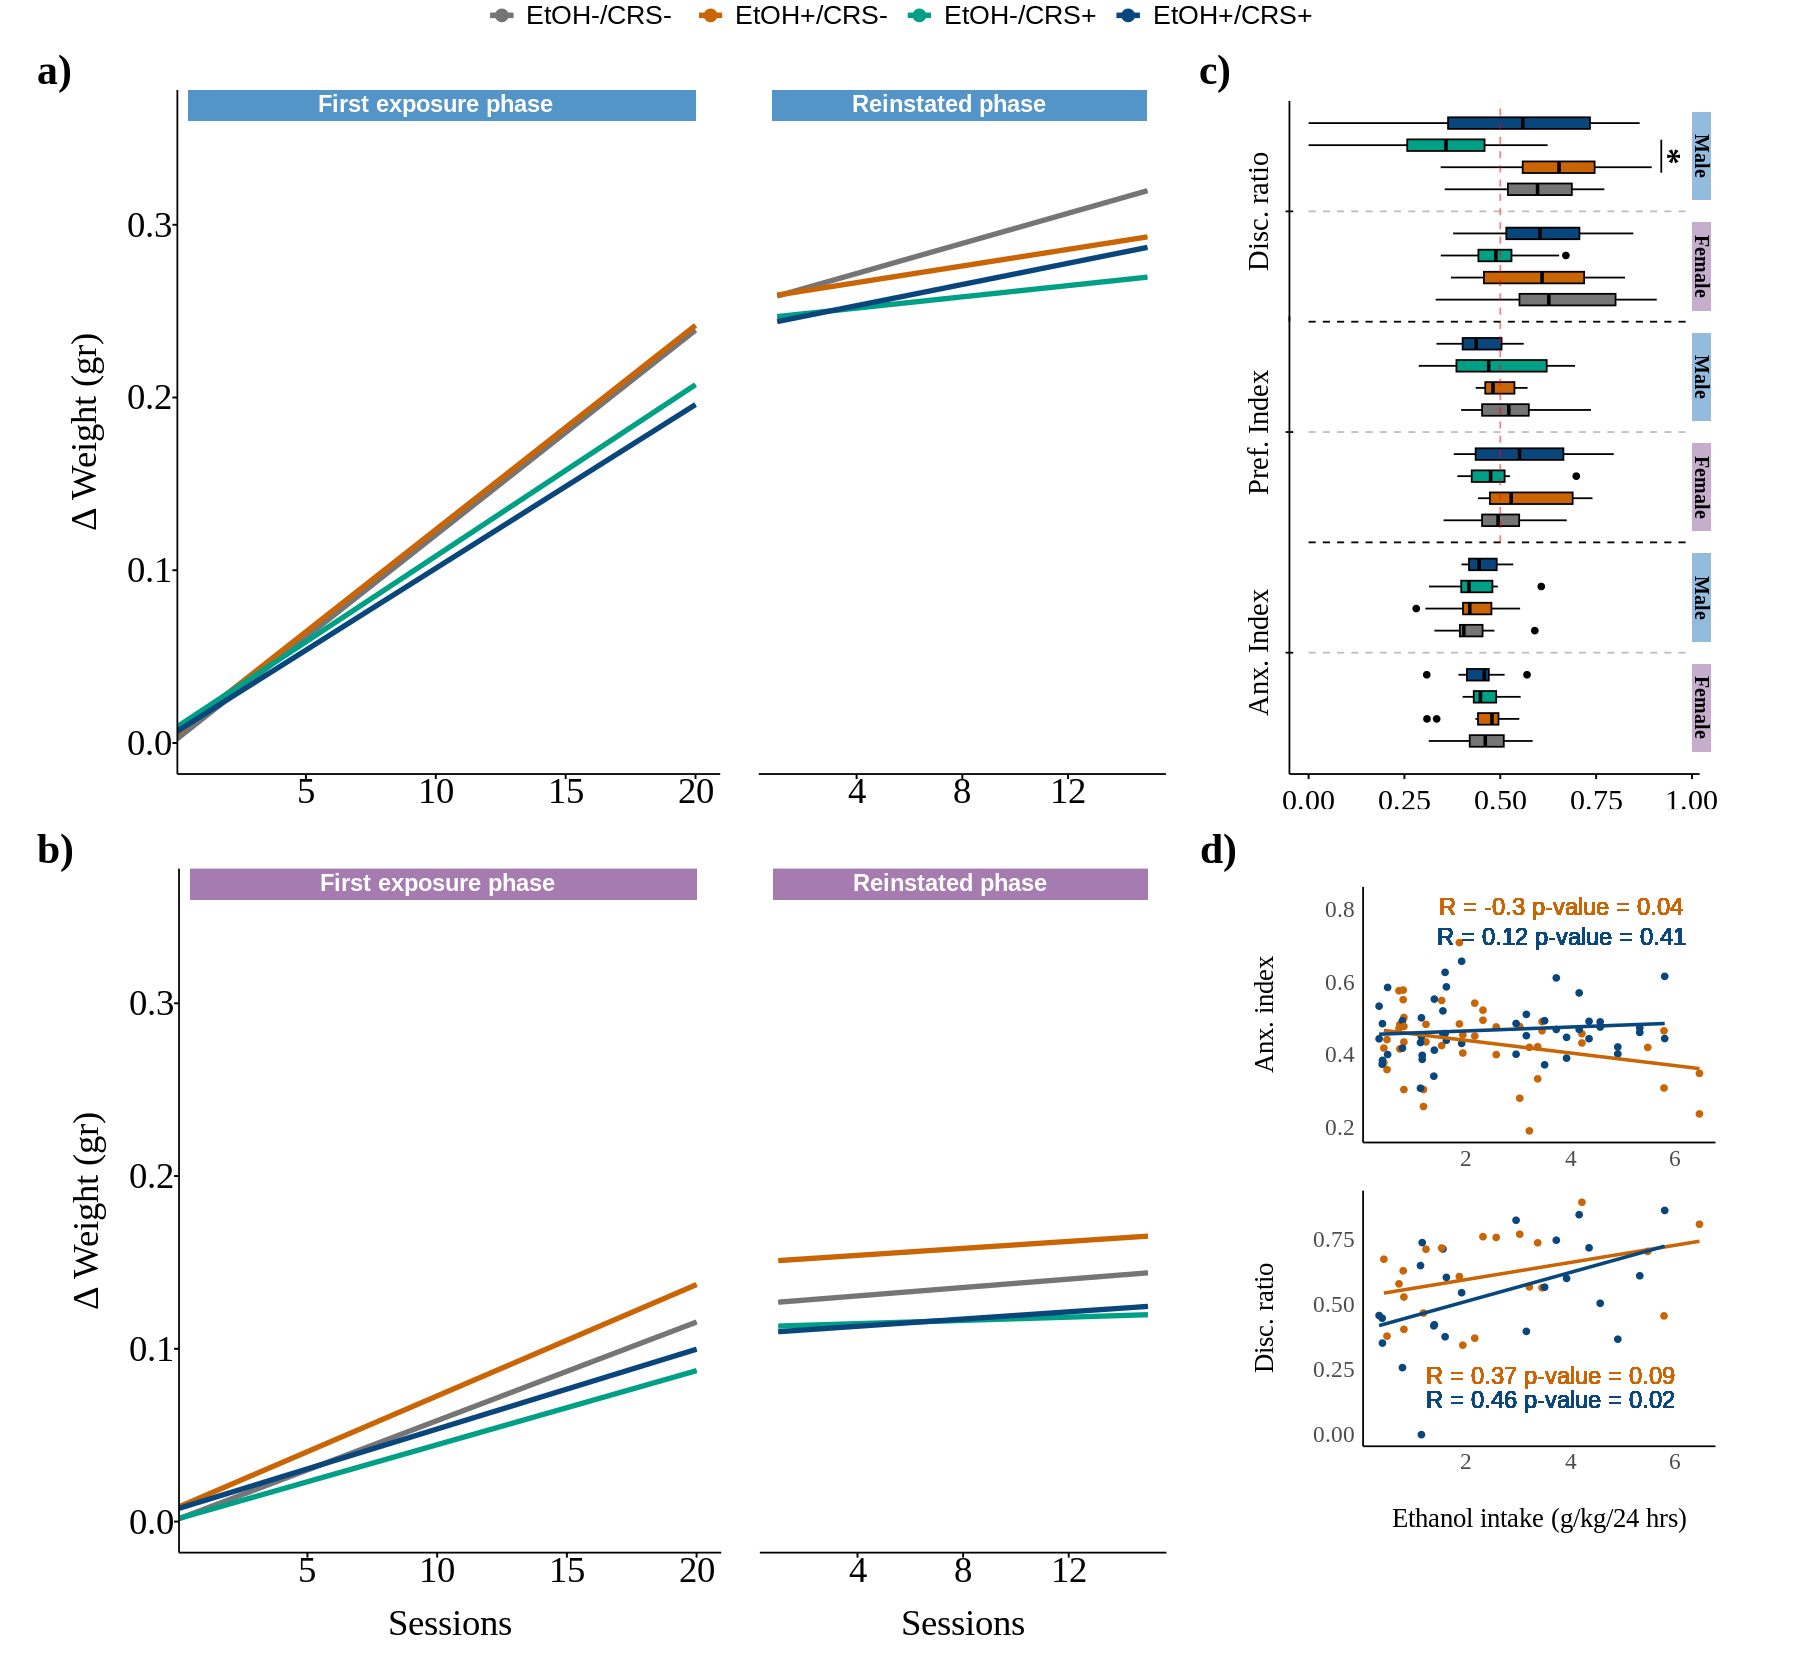

In [49]:
Weight_beh_final <- legd_weight + wrap_elements(weight_Beh_final_clss_M) + plot_spacer() + wrap_elements(weight_Beh_final_clss_F) + 
    plot_layout(heights = c(0.025,1.7,-0.22,1.7),ncol = 1)
Weight_beh_final

## **MRI figures**

In [50]:
# seeds <- readPNG("Figures/fMRI/Seeds.png")

In [51]:
# Fig.seeds1 <- ggarrange(rasterGrob(seeds),geom_blank(), ncol =2,nrow = 1,weights = c(1.5,0.5,0.5)) %>% .[[1]]
# Fig.seeds <- ggarrange(Fig.seeds1,geom_blank(),geom_blank(), ncol =1,heights = c(1.2,0.8,1))

#### **Figure for Model results**

In [52]:
# Read png files
# Poly1 <- readPNG("Figures/Results_Models/Poly_1.png")
# Poly2 <- readPNG("Figures/Results_Models/Poly_2.png")
# Fig.poly <- ggarrange(rasterGrob(Poly1),rasterGrob(Poly2,width = 0.55, height = 0.8))
# Fig.poly

In [53]:
# sig.names <- names(Model4_plots) %>% map(~ list.files("Figures/DBM/slices/png", pattern = .x, full.names = T) )
# slice_MRI <- sig.names %>% map(~ readPNG(.x,native = TRUE) ) %>% set_names(sig.names %>% map(~ .x %>% basename() ))

In [54]:
# ggp_image <- Model4_plots_blank$left_pre_limbic_system_left_Pmod4H_peaks +                  # Combine plot & image
#   inset_element(p = slice_MRI$`Mod4-left_pre_limbic_system_left_Pmod4H_peaks_Poly_High.png`,
#                 left = 0.7,
#                 bottom = 0.65,
#                 right = 0.95,
#                 top = 0.85)

In [55]:
# Model4_plots_blank <- names(Model4_plots) %>% map(~ ggarrange(Model4_plots[[.x]],geom_blank(), ncol =2,nrow = 1,widths = c(1.75,0.3)) ) %>%
#     set_names(names(Model4_plots))

In [56]:
# names(Model4_plots)  %>% map(~ Model4_plots_blank[[.x]] + inset_element(p = slice_MRI[[paste0("Mod4-",.x,"Poly_High.png")]], left = 0.7, bottom = 0.65, right = 0.95, top = 0.85) )

In [57]:
# dir.create("Figures/DBM/Trayectories_slices/",recursive = T,showWarnings = F)

In [58]:
# ggsave(plot = ggp_image, dpi=300,height = 7, width = 9,bg="white",
#        filename = "Figures/DBM/Trayectories_slices/borrar.png")

## **Export Figures**

In [59]:
dir.create("Figures/Final_Figures")

In [60]:
plot_objects <- ls(pattern = "consumption_final_")

walk(plot_objects, ~ggsave(plot = get(.x), dpi=300, height = 7, width = 15, bg="white",
                        filename = paste0("Figures/Consumption/", .x, ".png")))


In [61]:
ggsave(plot = consumption_final, dpi=300,height = 12, width = 16,bg="transparent",
       filename = "Figures/Final_Figures/Fig_Consumption.png")

In [62]:
ggsave(plot = Weight_beh_final, dpi=300,height = 12, width = 16,bg="white",
       filename = "Figures/Final_Figures/Fig_Weight_Behav.png")

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


In [63]:
ggsave(plot = legd_weight, dpi=300,height = 5, width = 7,bg="transparent",
       filename = "Figures/Final_Figures/legend.png")